# Iris Dataset: Neural Network Implementation

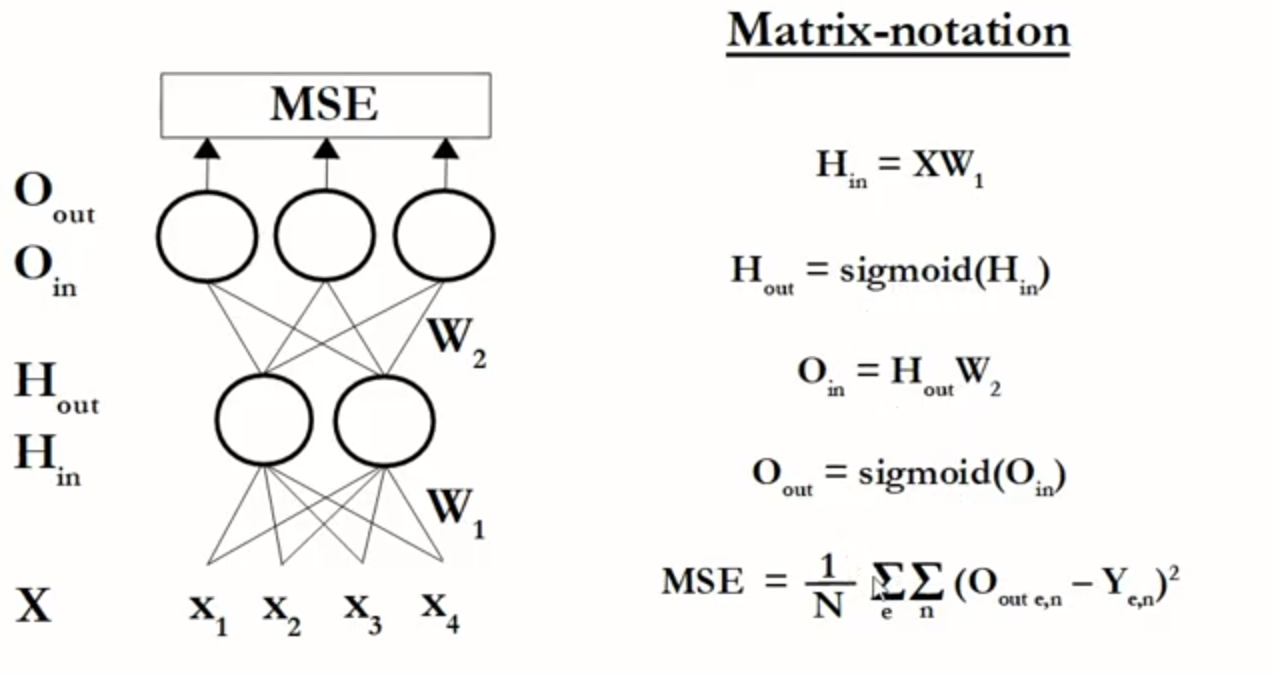

In [1]:
from IPython.display import Image
Image("feedforwardNN.png")

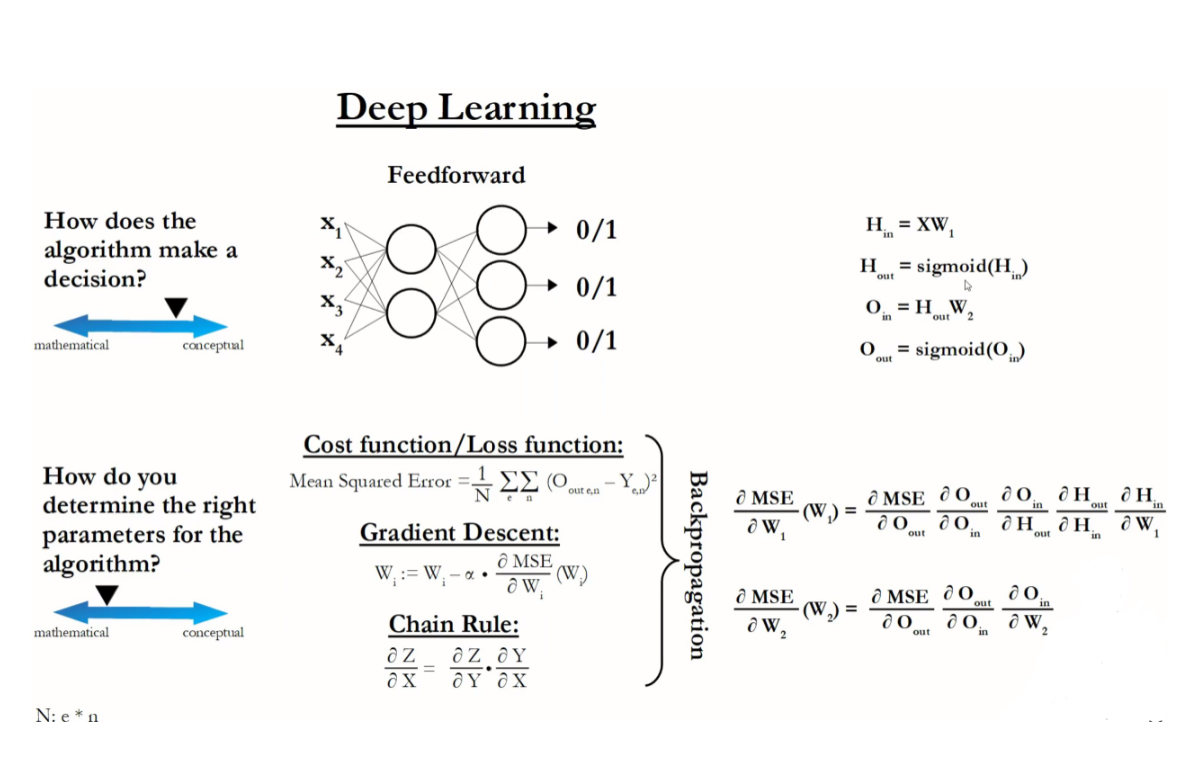

In [2]:
from IPython.display import Image
Image("Neural_Net.png")

Thanks to Sebastian Mantey and his great tutorial for mathematical explanation

# 1- Import key Modules

In [3]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline
from IPython.display import Image
from pprint import pprint

# 2- Load Data

iris dataset

In [5]:
# load data
df = pd.read_csv("Iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# one-hot encoding
one_hot_encode = pd.get_dummies(df.species)
df = df.join(one_hot_encode)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [7]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0


In [61]:
one_hot_encode.values[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [9]:
y = one_hot_encode.values
x=df[["sepal_length","sepal_width","petal_length","petal_width"]].values
N = y.size

In [10]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [12]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 3- Creating functions for building Neural Net

#### Helper Function

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum() / (2*N)
    
    return mse

In [15]:
def accuracy(predictions, labels):
    predicions_correct = predictions.argmax(axis=1) == labels.argmax(axis=1)
    accuracy = predicions_correct.mean()
    
    return accuracy

#### Hyperparameters

for optmization , and model building

In [16]:
learning_rate = 0.1

n_input = 4
n_hidden = 2
n_output = 3

In [17]:
np.random.seed(10)

weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# 4-Feedforward and Backpropagation

In [18]:
# feedforward
hidden_layer_inputs = np.dot(x, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [19]:
# backpropagation
output_layer_error = output_layer_outputs - y
output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

In [20]:
# weight updates using gradient desent
weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N # notice transpose
weights_1_update = np.dot(x.T, hidden_layer_delta) / N

weights_2 = weights_2 - learning_rate * weights_2_update
weights_1 = weights_1 - learning_rate * weights_1_update

In [21]:
# mse: cost function
mse = ((output_layer_outputs - y)**2).sum() / (2*N)
mse

0.1376238483304252

#### MSE after weights are updated

In [22]:
hidden_layer_inputs = np.dot(x, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [23]:
mse = ((output_layer_outputs - y)**2).sum() / (2*N)
mse

0.13731041772217373

### probability of each class

In [24]:
predictions=output_layer_outputs
predictions[:5]

array([[0.61556876, 0.39044986, 0.6376041 ],
       [0.61389807, 0.39089836, 0.63835648],
       [0.61299701, 0.39278431, 0.63485627],
       [0.61017757, 0.39478091, 0.63317857],
       [0.61469576, 0.39172566, 0.63552232]])

##### In terms of labels

In [25]:
predictions.argmax(axis=1)[:5]

array([2, 2, 2, 2, 2], dtype=int64)

There is slight decrease in cost function after updating weights. This means that we need to run feedforward and backpropagation algoritm multiple times so that weights and bias get more updates and we could see improvement in our model. Improvement means considerable amount of decrease in cost function.

# 5- Running Multiple Gradient Descent

Training on different epoch 

In [26]:
df = pd.read_csv("Iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
from sklearn.model_selection import train_test_split
y = pd.get_dummies(df.species).values
x = df.drop(["species"], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=4)
N = y_train.size

In [28]:
x_train[:5]

array([[5. , 3.2, 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [6.2, 2.2, 4.5, 1.5],
       [5. , 3.4, 1.6, 0.4],
       [4.7, 3.2, 1.6, 0.2]])

In [29]:
y_train[:5]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

### 5.1.Training (1)

In [30]:
# hyperparameters
learning_rate = 0.1
epochs = 1000

n_input = 4
n_hidden = 2
n_output = 3

np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

In [31]:
monitoring_df[:5]

,mean_squared_error,accuracy
0,0.139105,0.330769
1,0.138759,0.330769
2,0.138413,0.330769
3,0.138069,0.330769
4,0.137727,0.330769


In [32]:
monitoring_df.tail()

,mean_squared_error,accuracy
995,0.093935,0.630769
996,0.093908,0.630769
997,0.093881,0.630769
998,0.093854,0.630769
999,0.093826,0.630769


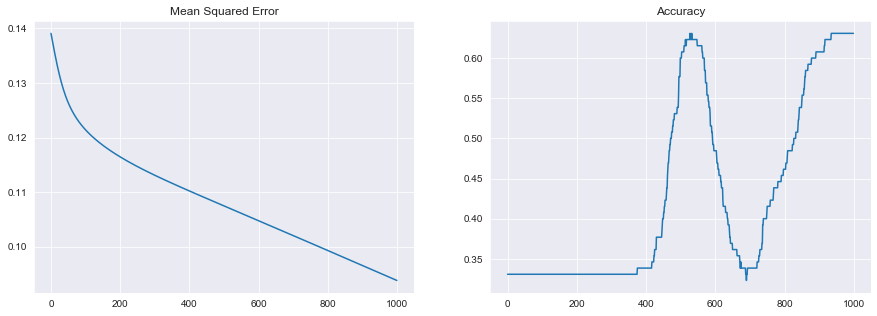

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

### 5.2.Training (2)

In [34]:
# hyperparameters
learning_rate = 0.1
epochs = 10000

n_input = 4
n_hidden = 2
n_output = 3

np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df2 = pd.DataFrame(monitoring)

In [35]:
monitoring_df2.head()

,mean_squared_error,accuracy
0,0.139105,0.330769
1,0.138759,0.330769
2,0.138413,0.330769
3,0.138069,0.330769
4,0.137727,0.330769


In [36]:
monitoring_df2.tail()

,mean_squared_error,accuracy
9995,0.057267,0.969231
9996,0.057266,0.969231
9997,0.057265,0.969231
9998,0.057265,0.969231
9999,0.057264,0.969231


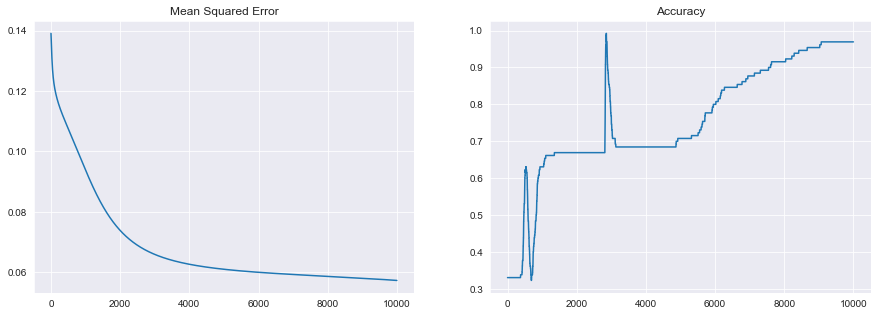

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df2.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df2.accuracy.plot(ax=axes[1], title="Accuracy");

### 5.3.Training (3)

In [38]:
# hyperparameters
learning_rate = 0.1
epochs = 15000

n_input = 4
n_hidden = 2
n_output = 3

np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df3 = pd.DataFrame(monitoring)

In [39]:
monitoring_df3.head()

,mean_squared_error,accuracy
0,0.139105,0.330769
1,0.138759,0.330769
2,0.138413,0.330769
3,0.138069,0.330769
4,0.137727,0.330769


In [40]:
monitoring_df3.tail()

,mean_squared_error,accuracy
14995,0.052355,0.984615
14996,0.052354,0.984615
14997,0.052354,0.984615
14998,0.052353,0.984615
14999,0.052352,0.984615


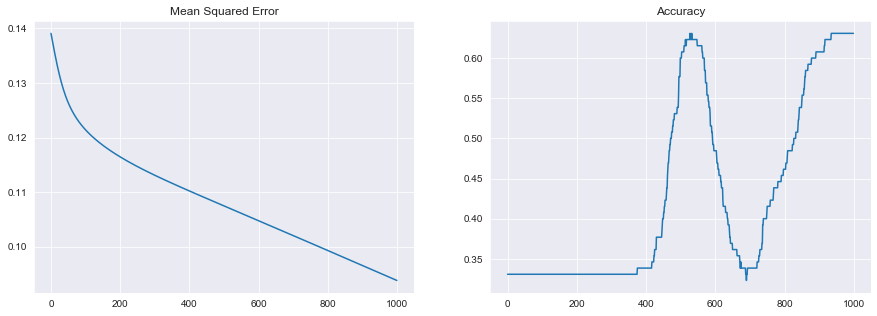

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

We have improved accuracy. It is important to note that this is for training set. We still need to validate our training model on test set

# 6- Model Validation

In [42]:
predictions=output_layer_outputs
predictions[:5]

array([[0.92635608, 0.24851467, 0.01676834],
       [0.03180266, 0.55065101, 0.64865332],
       [0.04438864, 0.51622127, 0.52629949],
       [0.91855471, 0.25064929, 0.01740885],
       [0.91435247, 0.25185977, 0.01778637]])

In [43]:
labels=y_train
labels[:5]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

**checking prediction type and label type**

In [44]:
# for labels of prob. and true values
predictions.argmax(axis=1)[:5]

array([0, 2, 2, 0, 0], dtype=int64)

In [45]:
labels.argmax(axis=1)[:5]

array([0, 2, 1, 0, 0], dtype=int64)

**Compare our prediction vs true value results**

In [46]:
result=predictions.argmax(axis=1) == labels.argmax(axis=1)
result[:5]

array([ True,  True, False,  True,  True])

In [47]:
#accuracy
result.mean()

0.9846153846153847

This accuracy is of training data.

#### check on Test data

In [48]:
# feedforward
hidden_layer_inputs = np.dot(x_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [49]:
acc = accuracy(output_layer_outputs, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.95


# 7- Different Random Data

Shuffle different random values. This is not bootsrap as we do not want any duplicate values in our samples

- We shall change random_state in train_test_split() and
- seed() value

In [50]:
y = pd.get_dummies(df.species).values
x = df.drop(["species"], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=7)
N = y_train.size

### 7.1.Training (1)

In [51]:
# hyperparameters
learning_rate = 0.1
epochs = 15000

n_input = 4
n_hidden = 2
n_output = 3

np.random.seed(3)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df1 = pd.DataFrame(monitoring)

In [52]:
monitoring_df1.head()

,mean_squared_error,accuracy
0,0.118940,0.330769
1,0.118904,0.330769
2,0.118869,0.330769
3,0.118834,0.330769
4,0.118799,0.330769


In [53]:
monitoring_df1.tail()

,mean_squared_error,accuracy
14995,0.111069,0.346154
14996,0.111069,0.346154
14997,0.111069,0.346154
14998,0.111069,0.346154
14999,0.111069,0.346154


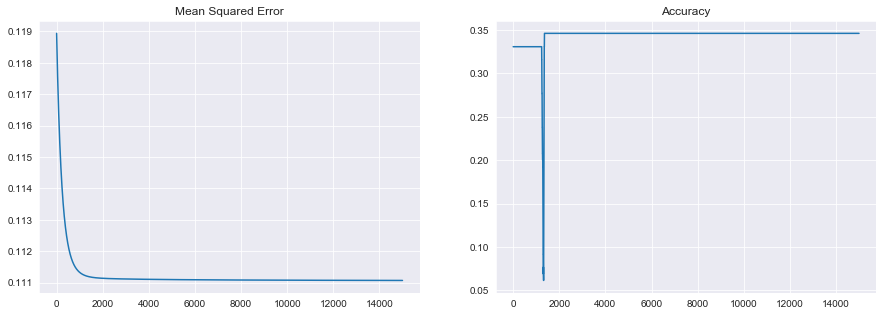

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df1.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df1.accuracy.plot(ax=axes[1], title="Accuracy");

### 7.2.Training (2)

- change size of hidden layer to see if model performs better

In [55]:
# hyperparameters
learning_rate = 0.1
epochs = 15000

n_input = 4
n_hidden = 6
n_output = 3

np.random.seed(3)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df2 = pd.DataFrame(monitoring)

In [56]:
monitoring_df2.head()

,mean_squared_error,accuracy
0,0.114127,0.346154
1,0.114066,0.346154
2,0.114006,0.346154
3,0.113947,0.346154
4,0.113887,0.346154


In [57]:
monitoring_df2.tail()

,mean_squared_error,accuracy
14995,0.011941,0.984615
14996,0.011940,0.984615
14997,0.011940,0.984615
14998,0.011939,0.984615
14999,0.011938,0.984615


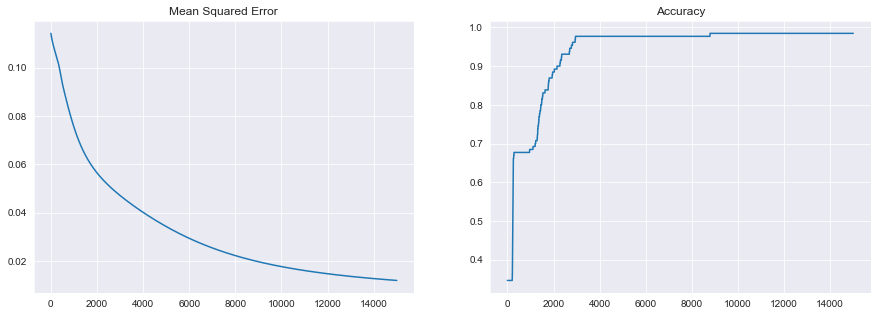

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df2.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df2.accuracy.plot(ax=axes[1], title="Accuracy");

### Validate Data

In [59]:
hidden_layer_inputs = np.dot(x_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [60]:
acc = accuracy(output_layer_outputs, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.9


So, making more layers do not mean that we shall have a better model performance. 